In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2015-world-aquatics-championships-swimming-results/2015_FINA.csv


In [47]:
# Add. Lib.
import matplotlib.pyplot as plt
import seaborn as sns



# FUNCTIONS:

# ECDF function
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

# Bootstrapping replicates
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates


In [48]:
df= pd.read_csv('/kaggle/input/2015-world-aquatics-championships-swimming-results/2015_FINA.csv', comment= "#")
df

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,...,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,1,29.63,50,930.0,PRE,100,1,FLY,29.63
1,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,2,63.65,100,930.0,PRE,100,1,FLY,34.02
2,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,1,31.33,50,1014.0,PRE,200,1,FLY,31.33
3,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,2,66.81,100,1014.0,PRE,200,1,FLY,35.48
4,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,3,103.29,150,1014.0,PRE,200,1,FLY,36.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11418,113494,COVENTRY,KIRSTY LEIGH,1983-09-16,F,Zimbabwe,ZIM,31,5,7,...,130.38,4,130.38,200,1030.0,PRE,200,1,BACK,32.74
11419,113494,COVENTRY,KIRSTY LEIGH,1983-09-16,F,Zimbabwe,ZIM,231,2,7,...,130.74,1,30.42,50,1749.0,SEM,200,1,BACK,30.42
11420,113494,COVENTRY,KIRSTY LEIGH,1983-09-16,F,Zimbabwe,ZIM,231,2,7,...,130.74,2,63.30,100,1749.0,SEM,200,1,BACK,32.88
11421,113494,COVENTRY,KIRSTY LEIGH,1983-09-16,F,Zimbabwe,ZIM,231,2,7,...,130.74,3,97.34,150,1749.0,SEM,200,1,BACK,34.04


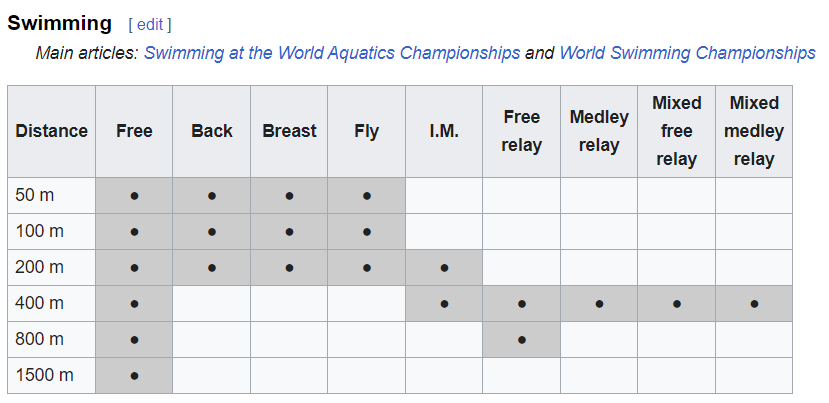

There are four different strokes, or ways of swimming, and each have their own competitions. They are freestyle, breaststroke, butterfly, and backstroke. It is important to note that because of the differences in the mechanics of the strokes, they are swum at different speeds. Swimming events encompass a range of distances and strokes. The freestyle includes races like 50m, 100m, 200m, 400m, 800m (Women's), and 1500m (Men's). Backstroke and Breaststroke events have 50m, 100m, and 200m races, while Butterfly has 50m, 100m, and 200m races. The Individual Medley combines all four strokes in 200m and 400m races. Relays involve teams competing in events like 4x100m and 4x200m Freestyle Relay and the 4x100m Medley Relay, with each swimmer using different strokes. The specific events offered may vary, but swimmers showcase their abilities in different strokes and distances.

## EVENTS
The number of events competed for at each edition of the championships has grown steadily through the years. In 1973, 29 events were swum: 15 for men and 14 for women, all in the pool. Since 2015, the combined number of events for men and women including pool and open water events has been 49, a drastic increase compared to the first edition. Historically, 50 different events have been held across the 17 editions of the championships. 


## Rounds of events

### HEAT:
In swimming competitions, a heat refers to a preliminary round where a group of swimmers compete in the same event. Swimmers are divided into different heats based on factors like their seed times or random draws. Heats are used to determine the fastest swimmers who will advance to the next round, which could be semifinals or finals, depending on the type of competition.

### SEMIFINALS:
Semifinals are the intermediate round that follows the heats in certain swimming competitions. Swimmers who qualify from the heats with the best times or positions will move on to the semifinals. In the semifinals, the remaining swimmers compete again to determine the finalists. The number of semifinals and swimmers advancing to the finals varies based on the competition's format and rules.

### FINALS: 
The finals are the ultimate round of a swimming event where the fastest swimmers from the heats and semifinals compete to determine the winners and medalists. Finals usually consist of the top swimmers who have advanced from the previous rounds. The finalists compete head-to-head, and the swimmer with the fastest time in the final round is declared the winner of the event.

In summary, heats are the preliminary rounds to qualify for the next stage, semifinals are the intermediate rounds to determine finalists, and finals are the ultimate rounds where the top swimmers compete for victory.










In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11423 entries, 0 to 11422
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   athleteid      11423 non-null  int64  
 1   lastname       11420 non-null  object 
 2   firstname      11423 non-null  object 
 3   birthdate      11423 non-null  object 
 4   gender         11423 non-null  object 
 5   name           11423 non-null  object 
 6   code           11423 non-null  object 
 7   eventid        11423 non-null  int64  
 8   heat           11423 non-null  int64  
 9   lane           11423 non-null  int64  
 10  points         11352 non-null  float64
 11  reactiontime   11362 non-null  float64
 12  swimtime       11364 non-null  float64
 13  split          11423 non-null  int64  
 14  cumswimtime    11364 non-null  float64
 15  splitdistance  11423 non-null  int64  
 16  daytime        11423 non-null  float64
 17  round          11423 non-null  object 
 18  distan

In [50]:
df.describe()


,athleteid,eventid,heat,lane,points,reactiontime,swimtime,split,cumswimtime,splitdistance,daytime,distance,relaycount,splitswimtime
count,11423.000000,11423.000000,11423.000000,11423.000000,11352.000000,11362.000000,11364.000000,11423.000000,11364.000000,11423.000000,11423.000000,11423.000000,11423.0,11364.000000
mean,106979.846713,53.145496,3.079576,4.485337,826.640592,0.720477,366.112536,6.295894,197.009175,314.794712,1191.631095,580.539263,1.0,31.018003
std,6947.941234,64.899494,2.055112,2.684634,111.965768,0.061721,342.458889,7.085242,224.460639,354.262102,332.091842,541.290529,0.0,3.640788
min,100392.000000,1.000000,1.000000,0.000000,52.000000,0.420000,21.190000,1.000000,21.190000,50.000000,930.000000,50.000000,1.0,21.190000
25%,101501.000000,13.000000,1.000000,2.000000,783.000000,0.680000,114.100000,1.000000,49.445000,50.000000,1000.000000,200.000000,1.0,29.100000
50%,103266.000000,30.000000,3.000000,4.000000,853.000000,0.720000,231.310000,3.000000,99.360000,150.000000,1048.000000,400.000000,1.0,30.820000
75%,110718.000000,39.000000,4.000000,7.000000,902.000000,0.760000,523.240000,8.000000,255.232500,400.000000,1117.000000,800.000000,1.0,32.770000
max,125573.000000,428.000000,12.000000,9.000000,1028.000000,0.970000,1137.270000,30.000000,1137.270000,1500.000000,1943.000000,1500.000000,1.0,101.020000


## Female Different Strokes Speed @ 200m

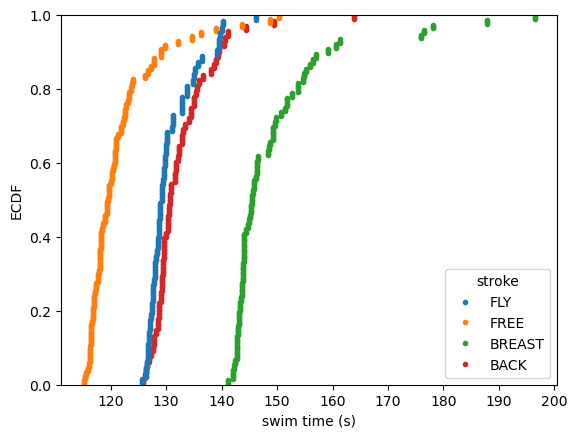

In [60]:
df['stroke'].value_counts()

female_speed = df[(df['gender'] == 'F') & (df['distance'] == 200) & (df['stroke'] != 'MEDLEY')]

sns.ecdfplot(data= female_speed, x= 'swimtime', hue='stroke', marker= '.', linestyle='none', legend=True)


plt.xlabel('swim time (s)')
plt.ylabel('ECDF')
plt.show()

## EDA of men's 200 free heats

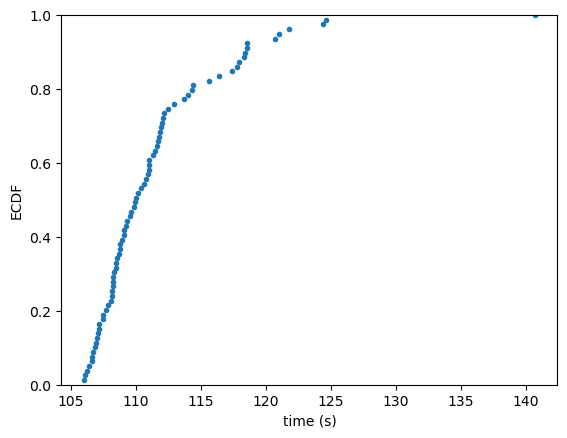

In [52]:
# Subset
mens_200_free = df[(df['gender'] == 'M') & (df['distance'] == 200) & (df['stroke'] == 'FREE') & (df['round'] == 'PRE') & (df['splitdistance'] == 200)]

# Plot ECDF
sns.ecdfplot(data=mens_200_free, x='swimtime',marker='.', linestyle='none')
plt.xlabel('time (s)')
plt.ylabel('ECDF')
plt.show()

## Parameter estimation and computation of confidence intervals
by computing the mean and median swim time for the men's 200 freestyle heats. The median is useful because it is immune to heavy tails in the distribution of swim times, such as the slow swimmers in the heats.

In [53]:
# Compute mean and median swim times
mean_time = np.mean(mens_200_free['swimtime'])
median_time = np.median(mens_200_free['swimtime'])

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = draw_bs_reps(mens_200_free['swimtime'], np.mean, 10000)
bs_reps_median = draw_bs_reps(mens_200_free['swimtime'], np.median, 10000)


# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean, [2.5, 97.5])
conf_int_median = np.percentile(bs_reps_median, [2.5, 97.5])

# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))


mean time: 111.63 sec.
95% conf int of mean: [110.50, 112.91] sec.

median time: 110.04 sec.
95% conf int of median: [108.96, 111.29] sec.

